Import numpy:

In [1]:
import numpy as np

Define the conv function:

In [2]:
def conv(image, im_filter):
    """
    :param image: grayscale image as a 2-dimensional numpy array
    :param im_filter: 2-dimensional numpy array
    """

    # input dimensions
    height = image.shape[0]
    width = image.shape[1]

    # output image with reduced dimensions
    im_c = np.zeros((height - len(im_filter) + 1,
                     width - len(im_filter) + 1))

    # iterate over all rows and columns
    for row in range(len(im_c)):
        for col in range(len(im_c[0])):
            # apply the filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    im_c[row, col] += image[row + i, col + j] * im_filter[i][j]

    # fix out-of-bounds values
    im_c[im_c > 255] = 255
    im_c[im_c < 0] = 0

    # plot images for comparison
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm

    plt.figure()
    plt.imshow(image, cmap=cm.Greys_r)
    plt.show()

    plt.imshow(im_c, cmap=cm.Greys_r)
    plt.show()

Download the image into numpy array:

In [11]:
import requests
from PIL import Image
from io import BytesIO

# load the image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Commander_Eileen_Collins_-_GPN-2000-001177.jpg/382px-Commander_Eileen_Collins_-_GPN-2000-001177.jpg?download"
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
resp = requests.get(url, headers=headers)
image_rgb = np.array(Image.open(BytesIO(resp.content)).convert("RGB"))

Convert to grayscale:

In [12]:
image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint)

Apply blur filter:

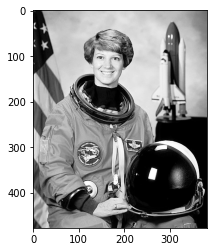

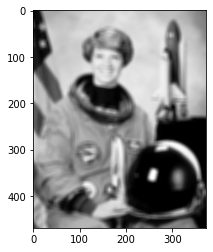

In [13]:
blur = np.full([10, 10], 1. / 100)
conv(image_grayscale, blur)

Apply horizontal Sobel filter:

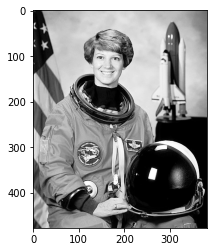

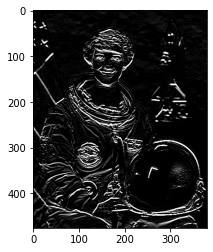

In [14]:
sobel_x = [[-1, -2, -1],
           [0, 0, 0],
           [1, 2, 1]]
conv(image_grayscale, sobel_x)

Apply vertical Sobel filter:

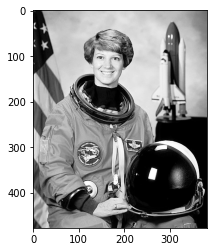

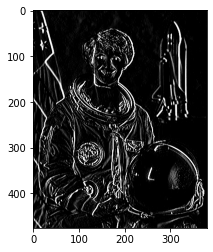

In [15]:
sobel_y = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
conv(image_grayscale, sobel_y)